# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [88]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [89]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [90]:
data.shape

(5391, 6)

In [91]:
print(f'Any NaN values among the data? {data.isna().values.any()}')

Any NaN values among the data? False


In [92]:
data[data.duplicated() == True].count()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [93]:
print(f'Any duplicates? {data.duplicated().values.any()}')

Any duplicates? False


In [94]:
duplicated_rows = data[data.duplicated()]
print(f'Number of duplicates: {len(duplicated_rows)}')

Number of duplicates: 0


In [95]:
data[data.duplicated(subset=['Movie_Title', 'Release_Date'])]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


> This duplicate wasn't caught above since the two entries have unique Rankings.

In [96]:
data[data['Movie_Title'] == "A Dog's Breakfast"]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3054,5289,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0
3055,5290,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


> Remove the duplicate entry

In [97]:
data = data.drop_duplicates(subset=['Movie_Title', 'Release_Date'])

In [98]:
f"There are {len(data[data.duplicated(subset=['Movie_Title', 'Release_Date'])])} duplicate Movie_Title by Release_Date"

'There are 0 duplicate Movie_Title by Release_Date'

In [99]:
data[data["Movie_Title"] == "A Dog's Breakfast"]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3054,5289,12/31/2007,A Dog's Breakfast,"$120,000",$0,$0


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5390 non-null   int64 
 1   Release_Date           5390 non-null   object
 2   Movie_Title            5390 non-null   object
 3   USD_Production_Budget  5390 non-null   object
 4   USD_Worldwide_Gross    5390 non-null   object
 5   USD_Domestic_Gross     5390 non-null   object
dtypes: int64(1), object(5)
memory usage: 294.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [101]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Convert USD_Production_Budget to numeric

> [How to use str.replace to replace multiple pairs at once?](https://stackoverflow.com/questions/62429677/how-to-use-str-replace-to-replace-multiple-pairs-at-once)

> [Change column type in pandas](https://stackoverflow.com/questions/15891038/change-column-type-in-pandas)

In [102]:
chars_in_str = ['$', ',']  # {'$':'', ',':''}

In [103]:
print(data.USD_Production_Budget[0])

$110,000


In [104]:
type(data.USD_Production_Budget[0])

str

In [105]:
type(data.USD_Production_Budget)

pandas.core.series.Series

In [106]:
type(data.USD_Production_Budget)

pandas.core.series.Series

In [107]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e'],
                   'USD_Budget': ['$100,000', '$385,907', '$200,000', '$100,000', '$245,000']})
df = df.replace(0, 5)
df.replace(regex='[$,]', value='')

,A,B,C,USD_Budget
0,5,5,a,100000
1,1,6,b,385907
2,2,7,c,200000
3,3,8,d,100000
4,4,9,e,245000


In [108]:
s = pd.Series(['$100,000', '$385,907', '$200,000', '$100,000', '$245,000'])
s1 = s
print(s)
print(type(s[0]))
# s = s.replace(to_replace='$', value='_')

s = s.replace(regex='[$,]', value='')

print(s)
type(s[0])

0    $100,000
1    $385,907
2    $200,000
3    $100,000
4    $245,000
dtype: object
<class 'str'>
0    100000
1    385907
2    200000
3    100000
4    245000
dtype: object


str

In [109]:
s = pd.to_numeric(s)
type(s[0])

numpy.int64

In [110]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [111]:
# data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace('$', '')
# data.USD_Production_Budget = data.USD_Production_Budget.astype(str).str.replace(',', '')
data = data.replace(regex='[$,]', value='')
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,20000 Leagues Under the Sea,200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [112]:
cols = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
for col in cols:
    data[col] = pd.to_numeric(data[col])



# data.USD_Production_Budget = data.USD_Production_Budget.replace(chars_in_str, '')

# data.USD_Production_Budget = pd.to_numeric(data.USD_Production_Budget, errors='raise')

In [113]:
data.USD_Production_Budget

0          110000
1          385907
2          200000
3          100000
4          245000
          ...    
5386     15000000
5387    160000000
5388    175000000
5389     50000000
5390     20000000
Name: USD_Production_Budget, Length: 5390, dtype: int64

In [114]:
type(data.USD_Production_Budget[0])

numpy.int64

In [115]:
data.USD_Production_Budget[1130]

14000000

In [116]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,20000 Leagues Under the Sea,200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


### Convert USD_Worldwide_Gross to numeric

> USD_Worldwide_Gross was already converted to numeric above.

In [117]:
data.USD_Worldwide_Gross[0]

11000000

In [118]:
type(data.USD_Worldwide_Gross[0])

numpy.int64

### Convert USD_Domestic_Gross to numeric

> USD_Domestic_Gross was already converted to numeric above.

In [119]:
data.USD_Domestic_Gross[0]

10000000

In [120]:
type(data.USD_Domestic_Gross[0])

numpy.int64

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [121]:
data.Release_Date[0]

'8/2/1915'

In [122]:
type(data.Release_Date[0])

str

In [123]:
data.Release_Date.head()

0      8/2/1915
1      5/9/1916
2    12/24/1916
3     9/17/1920
4      1/1/1925
Name: Release_Date, dtype: object

In [124]:
data.Release_Date = pd.to_datetime(data.Release_Date)
print(data.Release_Date[0])
type(data.Release_Date[0])

1915-08-02 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [125]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,20000 Leagues Under the Sea,200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5390 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5390 non-null   int64         
 1   Release_Date           5390 non-null   datetime64[ns]
 2   Movie_Title            5390 non-null   object        
 3   USD_Production_Budget  5390 non-null   int64         
 4   USD_Worldwide_Gross    5390 non-null   int64         
 5   USD_Domestic_Gross     5390 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 423.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [127]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,390.00","5,390.00","5,390.00","5,390.00"
mean,"2,695.52","31,119,487.81","88,871,907.20","41,243,169.82"
std,"1,556.14","40,525,356.93","168,469,037.10","66,033,082.74"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.25","5,000,000.00","3,877,146.00","1,335,065.75"
50%,"2,695.50","17,000,000.00","27,460,037.00","17,196,565.00"
75%,"4,042.75","40,000,000.00","96,461,821.00","52,348,661.50"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


> [Pandas format column as currency](https://stackoverflow.com/questions/35019156/pandas-format-column-as-currency) Instead of using a currency symbol like $, I amended the formating code to use USD.

In [128]:
print(f'The average production budget of films in the data set is: {"{:,.0f} USD".format(data.USD_Production_Budget.mean())}')

The average production budget of films in the data set is: 31,119,488 USD


In [129]:
print(f'The average worldwide gross revenue of films is: {"{:,.0f} USD".format(data.USD_Worldwide_Gross.mean())}')

The average worldwide gross revenue of films is: 88,871,907 USD


In [130]:
print(f'The minimums for worldwide and domestic revenue is: {"{:,.0f} USD".format(data.USD_Worldwide_Gross.min())} and {"{:,.0f} USD".format(data.USD_Domestic_Gross.min())} respectively')

The minimums for worldwide and domestic revenue is: 0 USD and 0 USD respectively


In [131]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,20000 Leagues Under the Sea,200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


> Create a profit column using the budget as the cost and Worldwide Gross as the total revenue. Then describe the data to see the results for the bottom 25%.
[how do I insert a column at a specific column index in pandas?](https://stackoverflow.com/questions/18674064/how-do-i-insert-a-column-at-a-specific-column-index-in-pandas)


In [132]:
USD_Profit = data.USD_Worldwide_Gross - data.USD_Production_Budget
USD_Profit.sort_values()
data.insert(loc=3, column='USD_Profit', value=USD_Profit)
data.head()

,Rank,Release_Date,Movie_Title,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,10890000,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,-385907,385907,0,0
2,5230,1916-12-24,20000 Leagues Under the Sea,7800000,200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,2900000,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,21755000,245000,22000000,11000000


In [133]:
data.describe()

,Rank,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,390.00","5,390.00","5,390.00","5,390.00","5,390.00"
mean,"2,695.52","57,752,419.39","31,119,487.81","88,871,907.20","41,243,169.82"
std,"1,556.14","140,983,205.26","40,525,356.93","168,469,037.10","66,033,082.74"
min,1.00,"-175,000,000.00","1,100.00",0.00,0.00
25%,"1,348.25","-2,247,010.50","5,000,000.00","3,877,146.00","1,335,065.75"
50%,"2,695.50","8,122,279.00","17,000,000.00","27,460,037.00","17,196,565.00"
75%,"4,042.75","59,525,309.00","40,000,000.00","96,461,821.00","52,348,661.50"
max,"5,391.00","2,358,918,982.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


In [134]:
print(f'The highest production budget and the highest worldwide gross revenue is: {"{:,.0f} USD".format(data.USD_Production_Budget.max())} and {"{:,.0f} USD".format(data.USD_Worldwide_Gross.max())} respectively')

The highest production budget and the highest worldwide gross revenue is: 425,000,000 USD and 2,783,918,982 USD respectively


> To find the film that had the largest production budget and the largest worldwide revenue:

In [135]:
data[data.USD_Production_Budget == data.USD_Production_Budget.max()]

,Rank,Release_Date,Movie_Title,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,2358918982,425000000,2783918982,760507625


In [136]:
data[data.USD_Worldwide_Gross == data.USD_Worldwide_Gross.max()]

,Rank,Release_Date,Movie_Title,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,2358918982,425000000,2783918982,760507625


In [137]:
data[data.USD_Production_Budget == data.USD_Production_Budget.max()]

,Rank,Release_Date,Movie_Title,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,2358918982,425000000,2783918982,760507625


In [138]:
data[data.USD_Production_Budget == data.USD_Production_Budget.min()]

,Rank,Release_Date,Movie_Title,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,179941,1100,181041,181041


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [139]:
len(data[data.USD_Domestic_Gross == 0])

511

In [140]:
zero_domestic_grossing = data[(data.USD_Domestic_Gross == 0)]

zero_domestic_grossing.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,-175000000,175000000,0,0
5387,126,2018-12-18,Aquaman,-160000000,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,-103000000,103000000,0,0
5385,366,2018-10-08,Amusement Park,-100000000,100000000,0,0
5090,556,2015-12-31,Don Gato el inicio de la pandilla,-75452340,80000000,4547660,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [141]:
len(data[data.USD_Worldwide_Gross == 0])

356

In [142]:
zero_ww_grossing = data[(data.USD_Worldwide_Gross == 0)]
zero_ww_grossing.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,-175000000,175000000,0,0
5387,126,2018-12-18,Aquaman,-160000000,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,-103000000,103000000,0,0
5385,366,2018-10-08,Amusement Park,-100000000,100000000,0,0
5338,879,2017-04-08,The Dark Tower,-60000000,60000000,0,0


### Filtering on Multiple Conditions

In [143]:
intl_releases = data.loc[(data.USD_Domestic_Gross == 0) & (data.USD_Worldwide_Gross != 0)]
print(f'Number of international releases: {len(intl_releases)}')
intl_releases.sort_values('USD_Worldwide_Gross', ascending=False)

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2836,1270,2006-12-31,Les Bronzés 3: amis pour la vie,41833602,42000000,83833602,0
4960,3283,2015-08-05,La famille Bélier,63056184,11000000,74056184,0
3809,2154,2010-12-31,Sammy's avonturen: De geheime doorgang,46594792,25000000,71594792,0
3769,2776,2010-11-05,Haeundae,48733391,16000000,64733391,0
3051,2665,2007-12-31,Taxi 4,43365364,17500000,60865364,0
...,...,...,...,...,...,...,...
5141,4076,2016-02-09,Yoga Hosers,-4997801,5000000,2199,0
3573,5015,2010-01-26,B-Girl,-698840,700000,1160,0
5103,4625,2015-12-31,To Be Frank Sinatra at 100,-1999074,2000000,926,0
4772,5005,2014-12-31,Destiny,-749550,750000,450,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [144]:
intl_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0').sort_values('USD_Worldwide_Gross', ascending=False)
print(f'Number of international releases: {len(intl_releases)}')
intl_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5141,4076,2016-02-09,Yoga Hosers,-4997801,5000000,2199,0
3573,5015,2010-01-26,B-Girl,-698840,700000,1160,0
5103,4625,2015-12-31,To Be Frank Sinatra at 100,-1999074,2000000,926,0
4772,5005,2014-12-31,Destiny,-749550,750000,450,0
5061,4927,2015-11-12,American Hero,-999974,1000000,26,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [145]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [146]:
data[data.Release_Date > scrape_date]

,Rank,Release_Date,Movie_Title,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,-103000000,103000000,0,0
5385,366,2018-10-08,Amusement Park,-100000000,100000000,0,0
5386,2950,2018-10-08,Meg,-15000000,15000000,0,0
5387,126,2018-12-18,Aquaman,-160000000,160000000,0,0
5388,96,2020-12-31,Singularity,-175000000,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,-50000000,50000000,0,0
5390,2517,2020-12-31,Story of Bonnie and Clyde The,-20000000,20000000,0,0


In [147]:
future_releases = data[data.Release_Date >= scrape_date]
print(f'Number of unreleased movies: {len(future_releases)}')

Number of unreleased movies: 7


In [148]:
data_clean = data[data.Release_Date < scrape_date]
print(len(data_clean))
data_clean.head()

5383


,Rank,Release_Date,Movie_Title,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,10890000,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,-385907,385907,0,0
2,5230,1916-12-24,20000 Leagues Under the Sea,7800000,200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,2900000,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,21755000,245000,22000000,11000000


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [149]:
losers = len(data_clean.query('USD_Profit < 0'))
percentage_of_losers = losers / len(data_clean) * 100
print(f'The percentage of films that lost money relative to the total number of films is: {"{:,.0f}%".format(percentage_of_losers)}')

The percentage of films that lost money relative to the total number of films is: 37%


# Seaborn for Data Viz: Bubble Charts

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



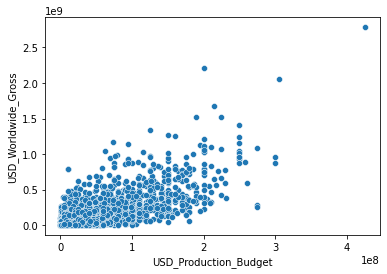

In [150]:
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')

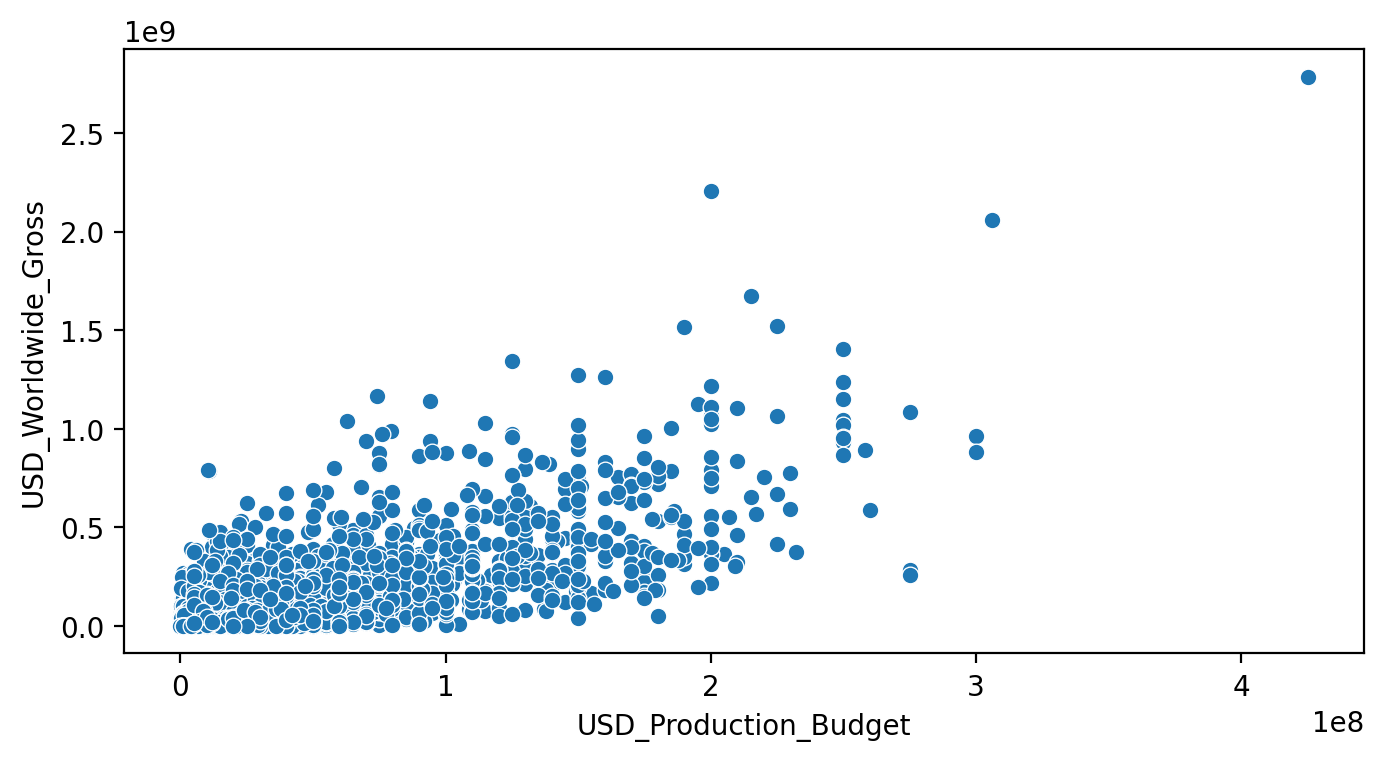

In [151]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')
plt.show()


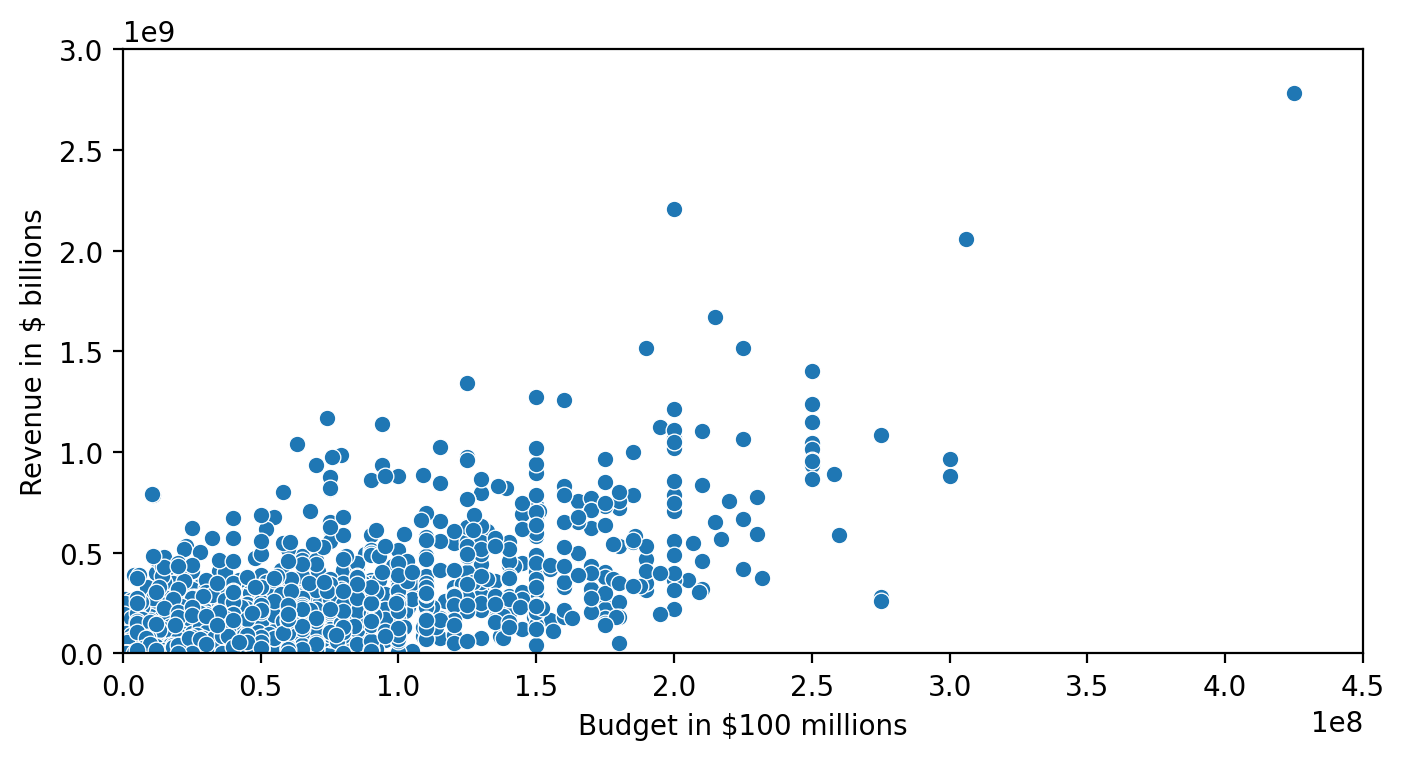

In [152]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross')
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

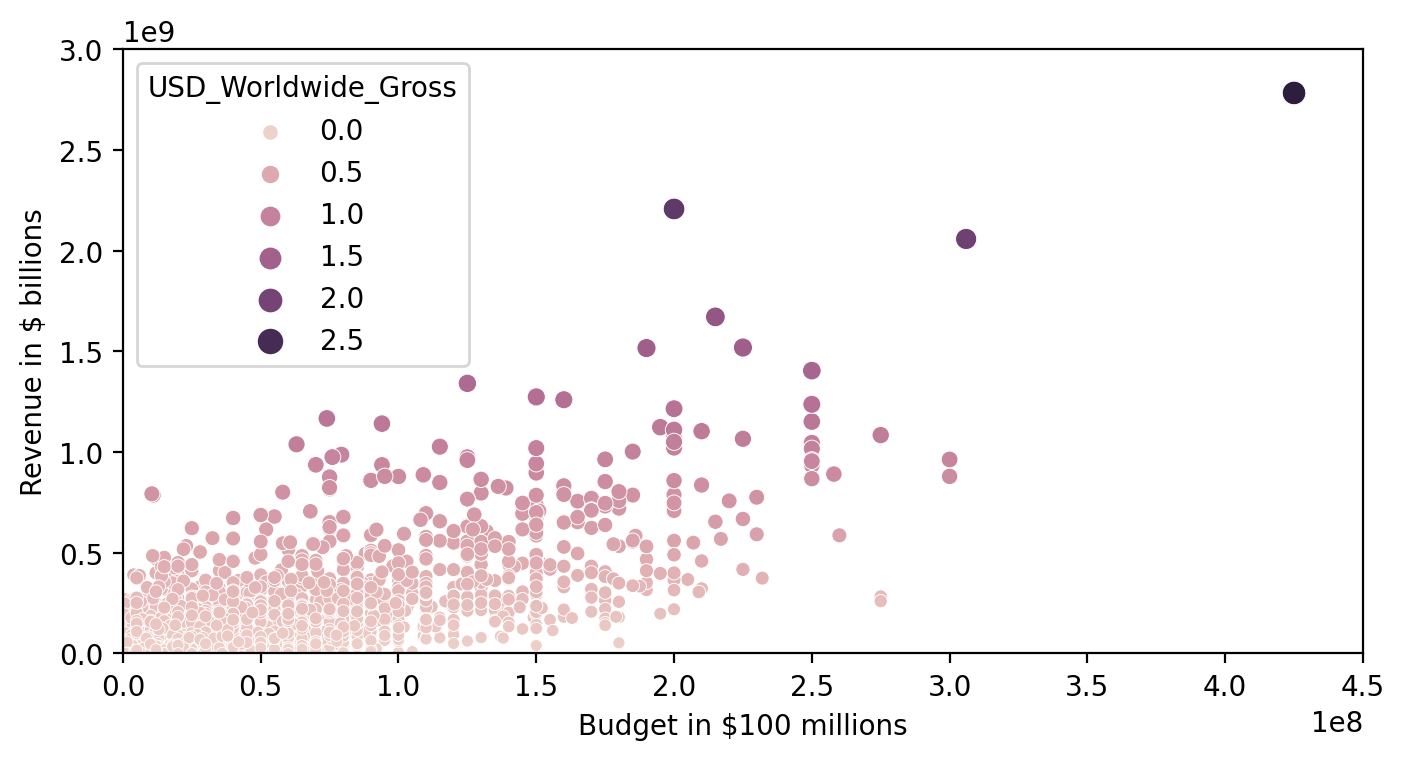

In [153]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget',
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # COLOUR
                     size='USD_Worldwide_Gross',) # dot size
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

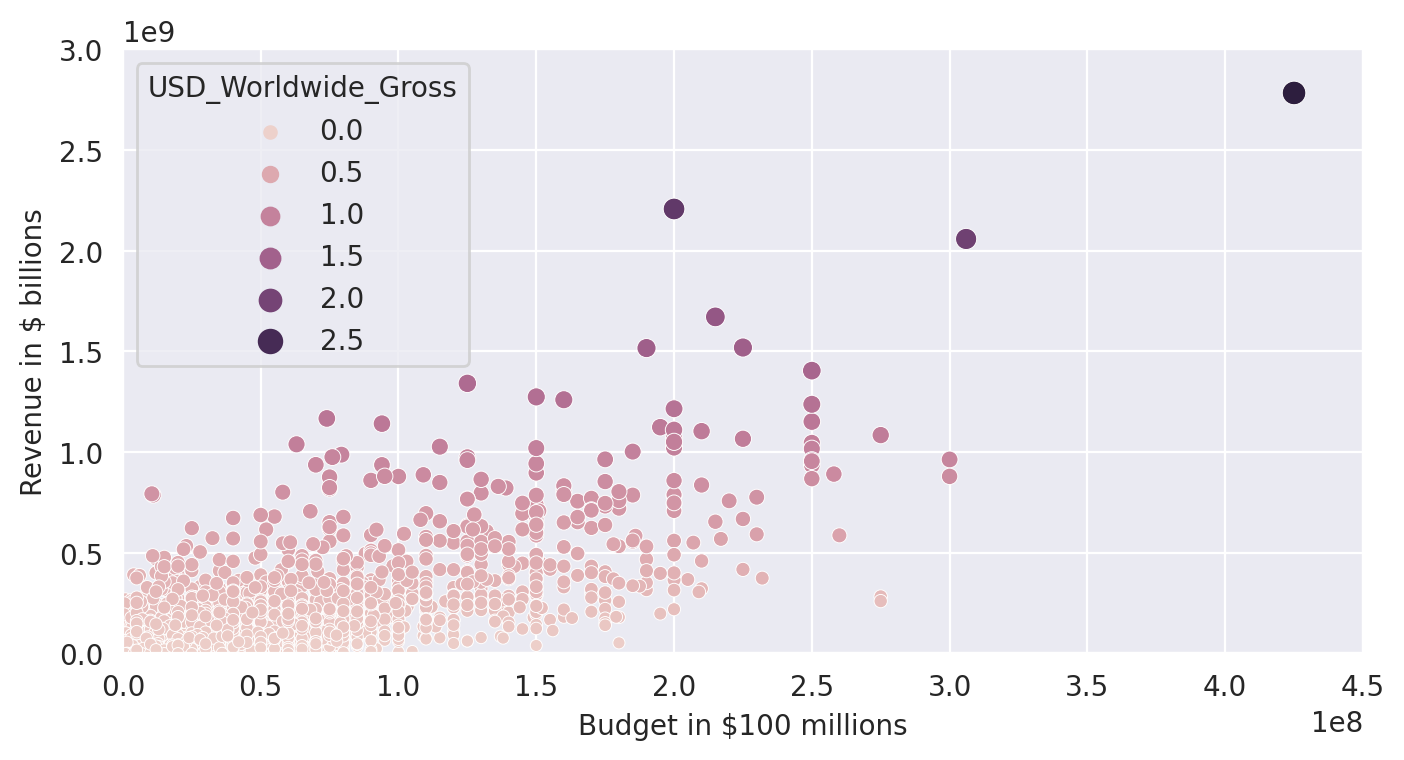

In [154]:
plt.figure(figsize=(8,4), dpi=200)

# set stying on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                        x='USD_Production_Budget',
                        y='USD_Worldwide_Gross',
                        hue='USD_Worldwide_Gross', # COLOUR
                        size='USD_Worldwide_Gross',) # dot size
    ax.set(ylim=(0, 3000000000),
          xlim=(0, 450000000),
          ylabel='Revenue in $ billions',
          xlabel='Budget in $100 millions')

plt.show()

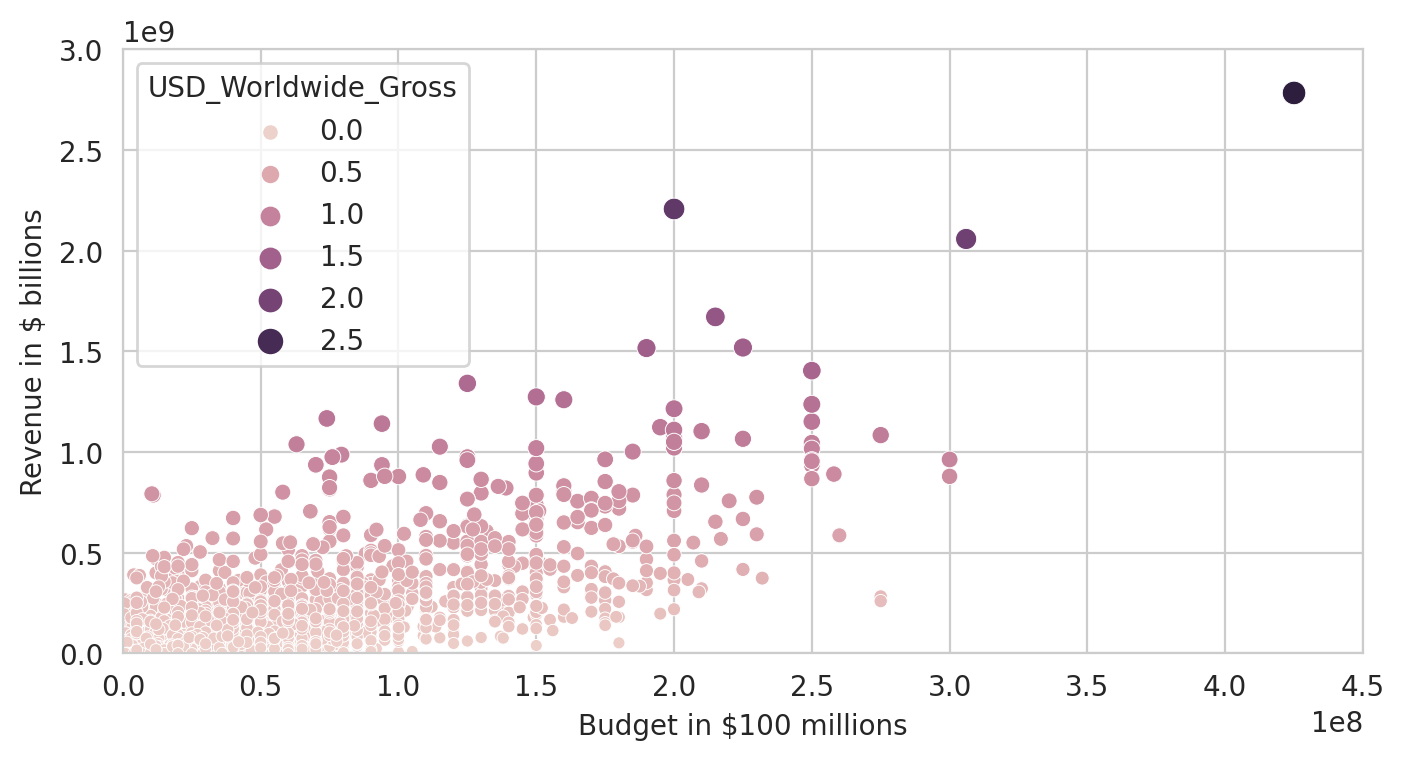

In [155]:
plt.figure(figsize=(8,4), dpi=200)

# set stying on a single chart
with sns.axes_style('whitegrid'):
    ax = sns.scatterplot(data=data_clean,
                        x='USD_Production_Budget',
                        y='USD_Worldwide_Gross',
                        hue='USD_Worldwide_Gross', # COLOUR
                        size='USD_Worldwide_Gross',) # dot size
    ax.set(ylim=(0, 3000000000),
          xlim=(0, 450000000),
          ylabel='Revenue in $ billions',
          xlabel='Budget in $100 millions')

plt.show()

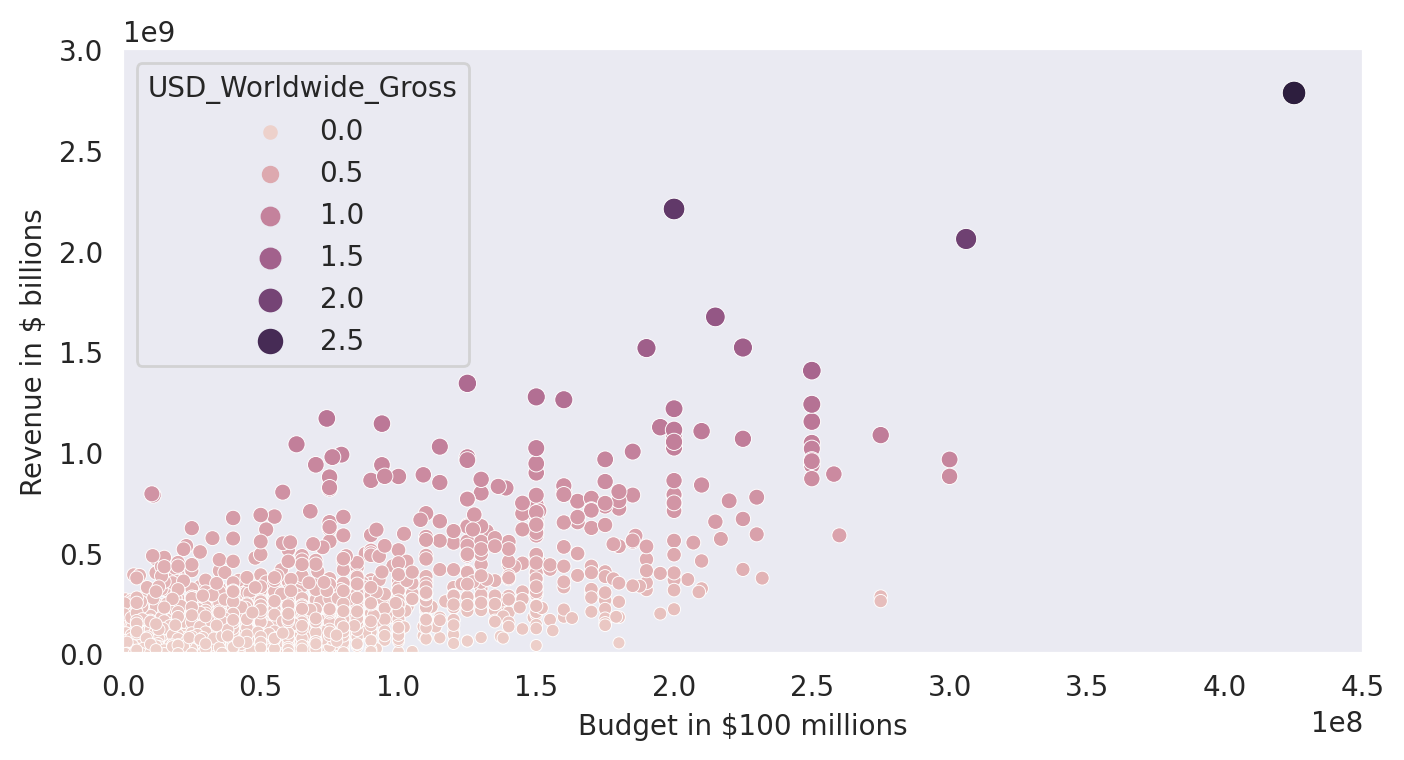

In [156]:
plt.figure(figsize=(8,4), dpi=200)

# set stying on a single chart
with sns.axes_style('dark'):
    ax = sns.scatterplot(data=data_clean,
                        x='USD_Production_Budget',
                        y='USD_Worldwide_Gross',
                        hue='USD_Worldwide_Gross', # COLOUR
                        size='USD_Worldwide_Gross',) # dot size
    ax.set(ylim=(0, 3000000000),
          xlim=(0, 450000000),
          ylabel='Revenue in $ billions',
          xlabel='Budget in $100 millions')

plt.show()

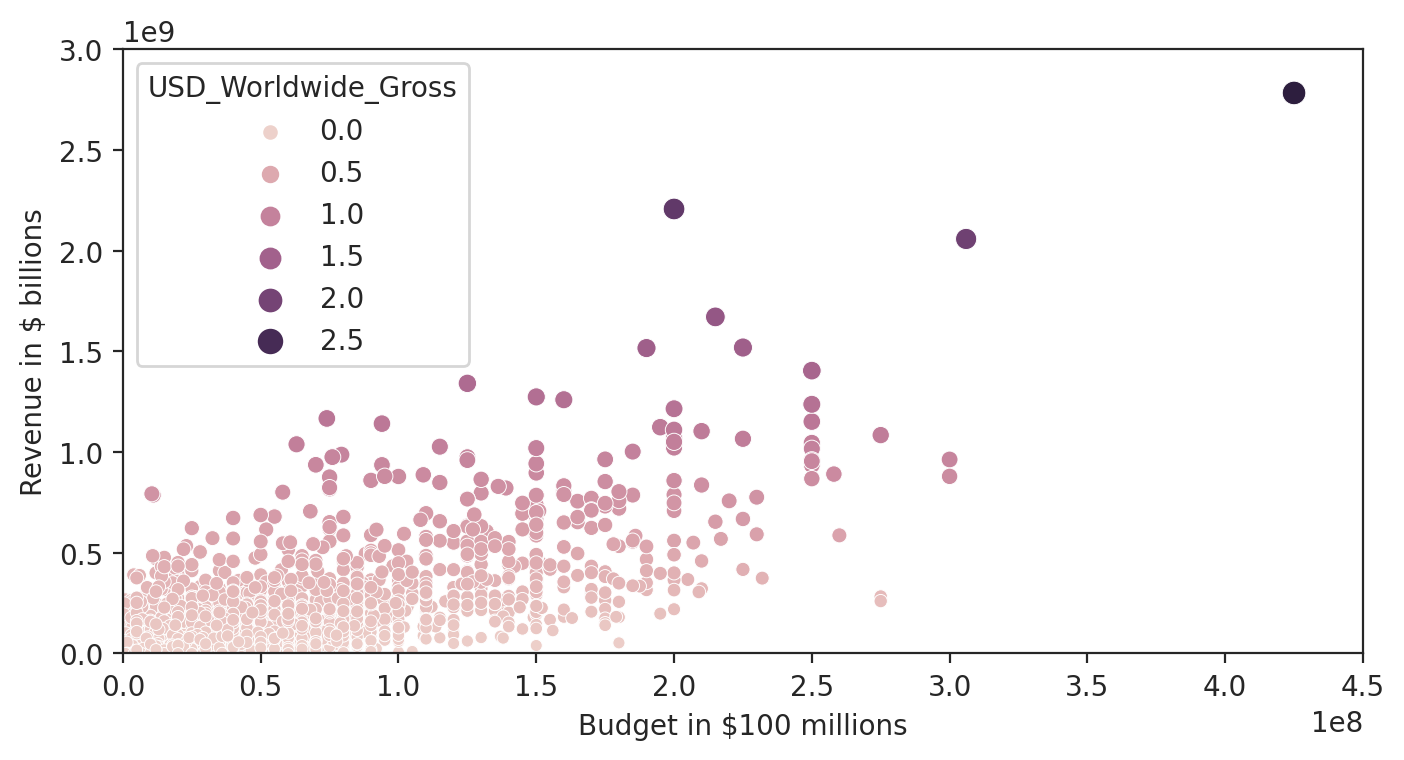

In [157]:
plt.figure(figsize=(8,4), dpi=200)

# set stying on a single chart
with sns.axes_style('ticks'):
    ax = sns.scatterplot(data=data_clean,
                        x='USD_Production_Budget',
                        y='USD_Worldwide_Gross',
                        hue='USD_Worldwide_Gross', # COLOUR
                        size='USD_Worldwide_Gross',) # dot size
    ax.set(ylim=(0, 3000000000),
          xlim=(0, 450000000),
          ylabel='Revenue in $ billions',
          xlabel='Budget in $100 millions')

plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [158]:
release_year = pd.DatetimeIndex(data_clean.Release_Date).year
release_decade = release_year // 10
release_decade = release_decade * 10
data_clean.insert(loc=7, column='Decade', value=release_decade)
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,10890000,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,-385907,385907,0,0,1910
2,5230,1916-12-24,20000 Leagues Under the Sea,7800000,200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,2900000,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,21755000,245000,22000000,11000000,1920


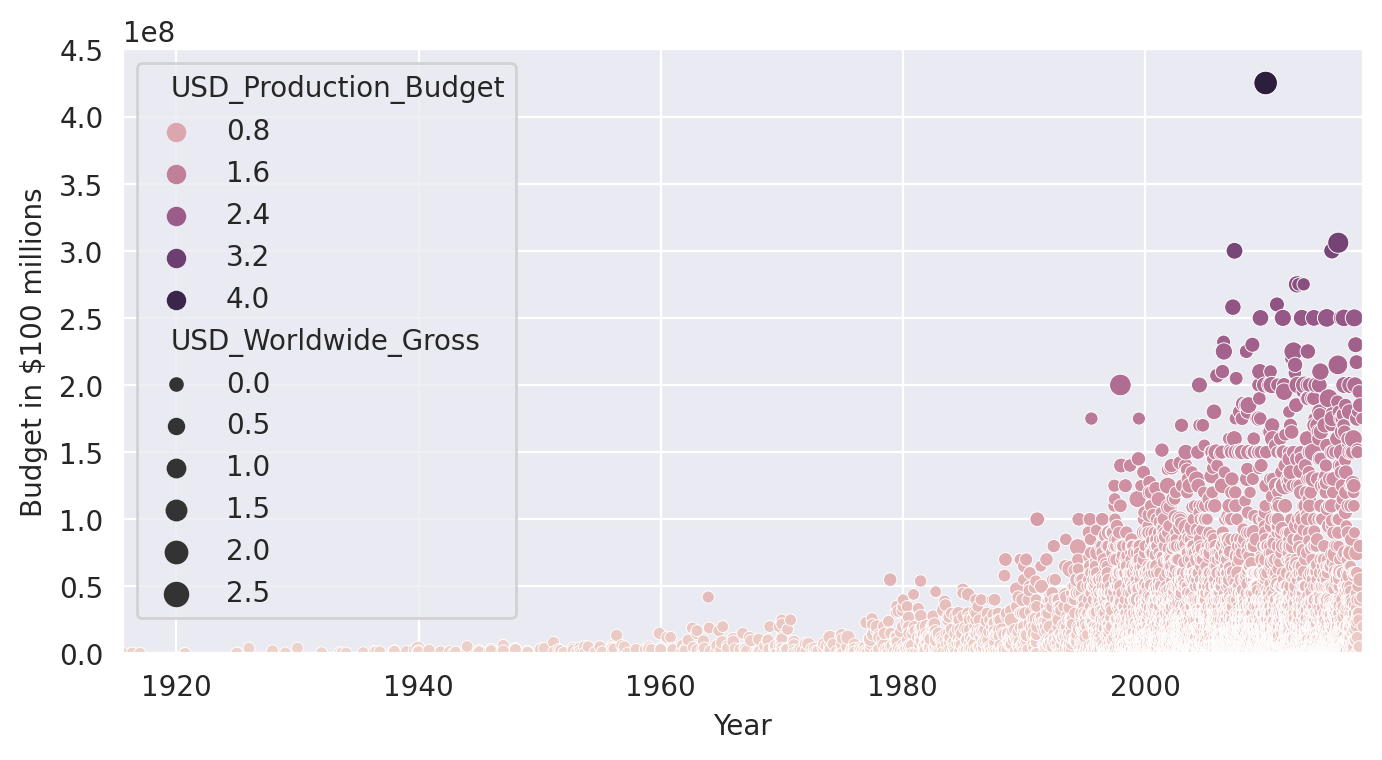

In [159]:
plt.figure(figsize=(8,4), dpi=200)

# set stying on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                        x='Release_Date',
                        y='USD_Production_Budget',
                        hue='USD_Production_Budget', # COLOUR
                        size='USD_Worldwide_Gross',) # dot size
    ax.set(ylim=(0, 450000000),
          xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
          ylabel='Budget in $100 millions',
          xlabel='Year')

plt.show()

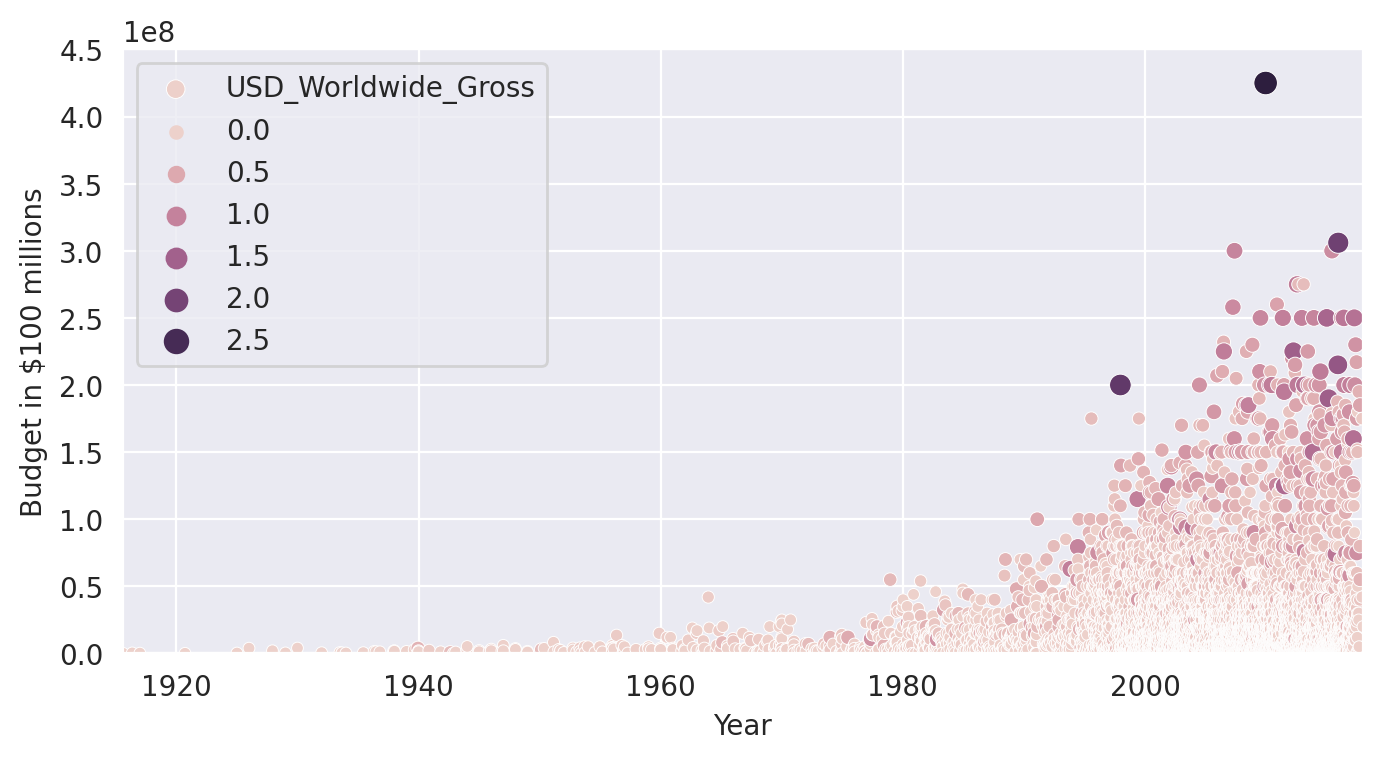

In [160]:
plt.figure(figsize=(8,4), dpi=200)

# set stying on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(data=data_clean,
                         x='Release_Date',
                         y='USD_Production_Budget',
                         hue='USD_Worldwide_Gross', # COLOUR
                         size='USD_Worldwide_Gross', # dot size
                         label='USD_Worldwide_Gross') 
    ax.set(ylim=(0, 450000000),
          xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
          ylabel='Budget in $100 millions',
          xlabel='Year')
    ax.legend()

plt.show()

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [161]:
old_films = data_clean.query('Decade < 1970')
new_films = data_clean.query('Decade >= 1970')

In [162]:
print(f'{len(old_films)} films were released prior to 1970')

153 films were released prior to 1970


In [163]:
old_films[old_films.USD_Production_Budget == old_films.USD_Production_Budget.max()]

,Rank,Release_Date,Movie_Title,USD_Profit,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,29000000,42000000,71000000,57000000,1960


# Seaborn Regression Plots

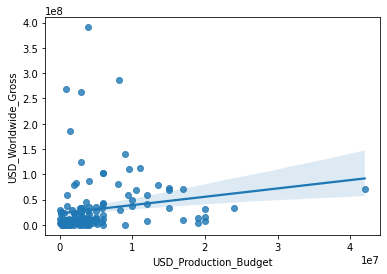

In [164]:
sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')

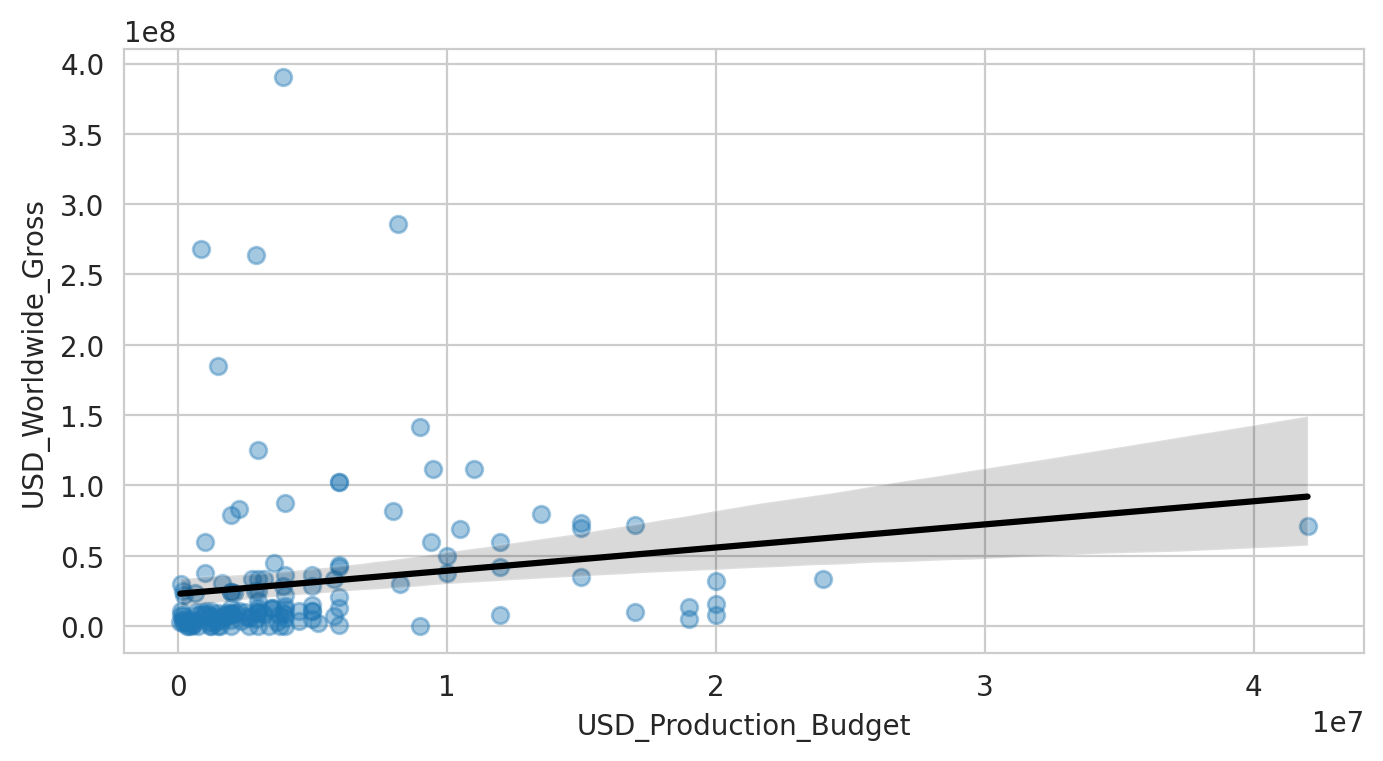

In [165]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(data=old_films,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                scatter_kws = {'alpha': 0.4},
                line_kws = {'color': 'black'})

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

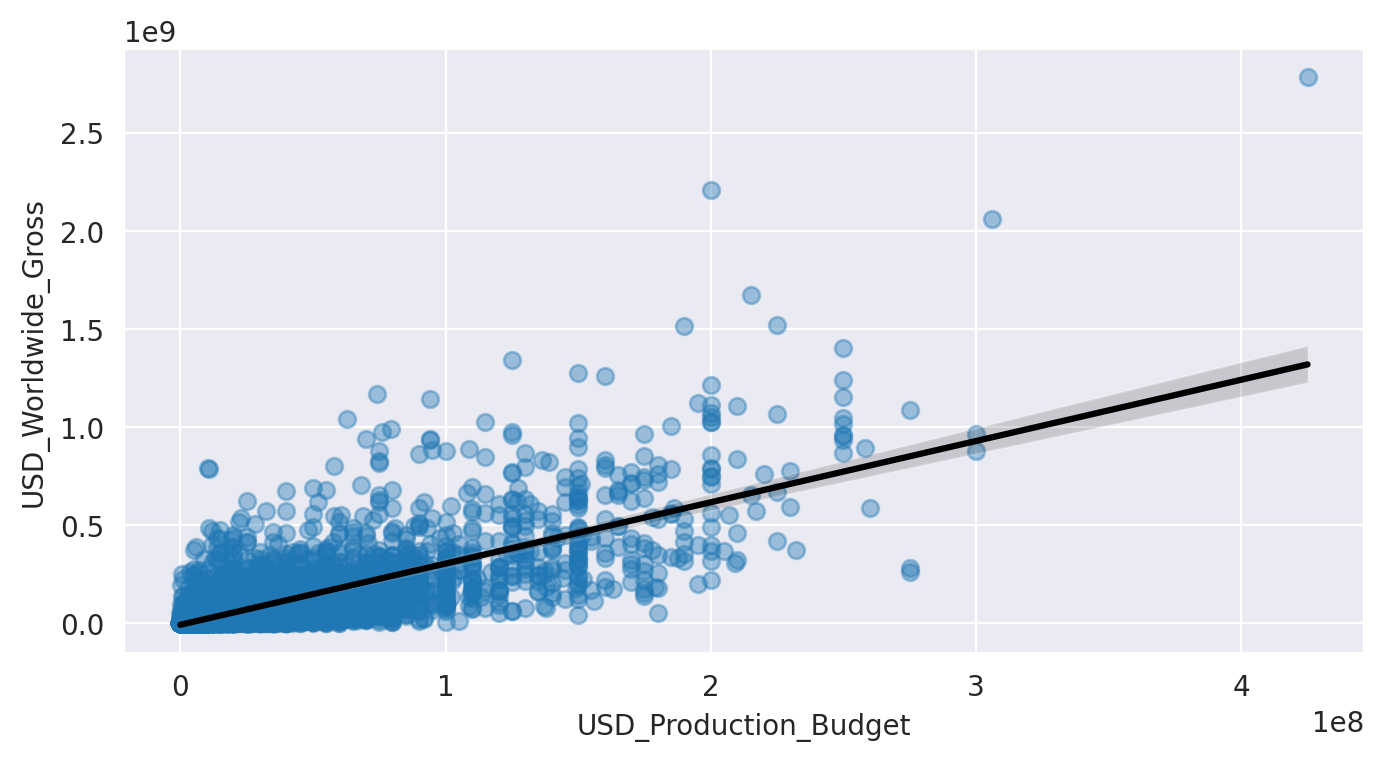

In [166]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
    sns.regplot(data=new_films,
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross',
                scatter_kws = {'alpha': 0.4},
                line_kws = {'color': 'black'})

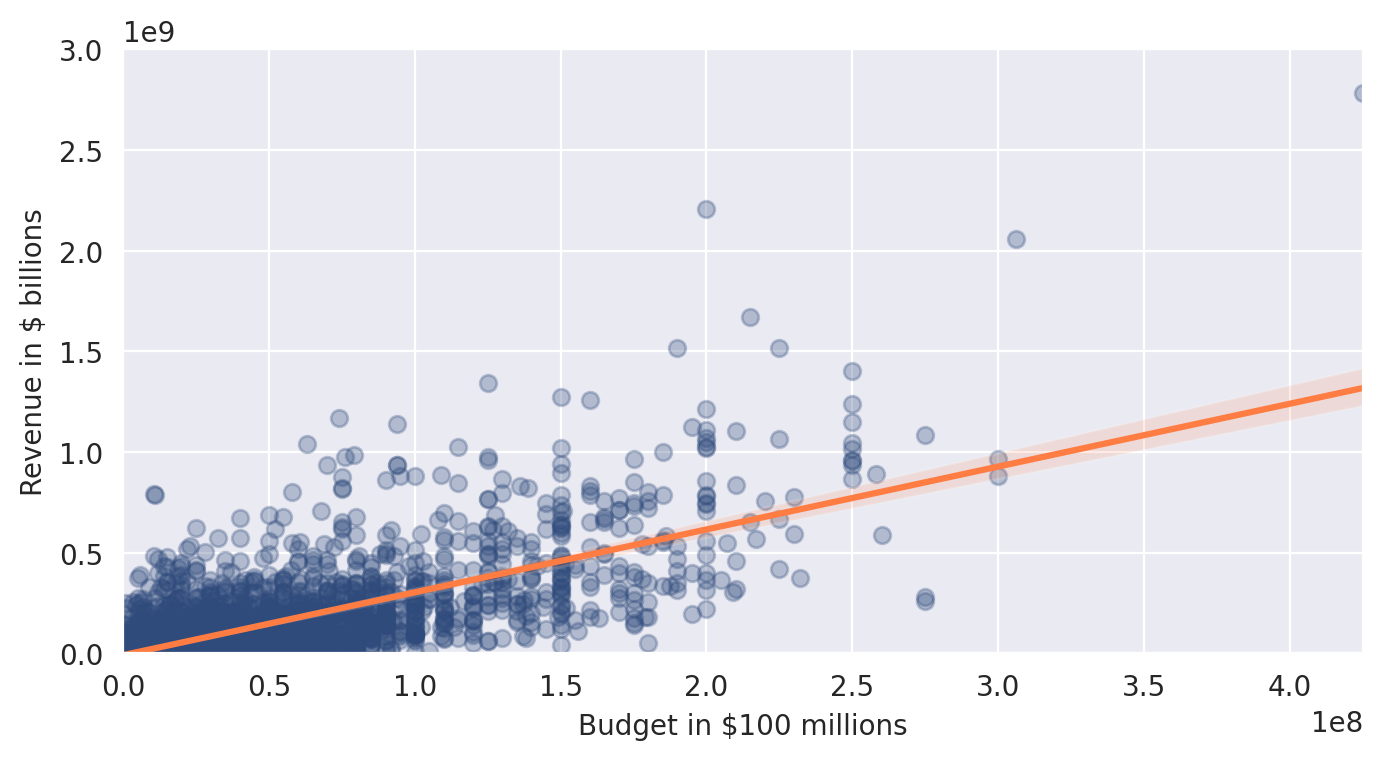

In [167]:
plt.figure(figsize=(8,4), dpi=200)

# set stying on a single chart
with sns.axes_style('darkgrid'):
    ax = sns.regplot(data=new_films,
                         x='USD_Production_Budget',
                         y='USD_Worldwide_Gross',
                         scatter_kws = {'alpha': 0.3, 'color': '#2f4b7c'},
                        #  hue='USD_Worldwide_Gross', # COLOUR
                         line_kws = {'color': '#ff7c43'}) 
    ax.set(ylim=(0, 3000000000),
           xlim=(0, new_films.USD_Production_Budget.max()),
           ylabel='Revenue in $ billions',
           xlabel='Budget in $100 millions')

plt.show()

> Data points align much more closely to the regression line for the new_films data.
> Films with a budget of $150 million can be expected to gross $500 million by extrapolation.

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [171]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

regression.fit(X, y)
regression.intercept_

array([-8653311.20858923])

In [172]:
regression.coef_

array([[3.12262611]])

In [173]:
# R-squared
regression.score(X, y)

0.5576797626619335

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [177]:
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression.fit(X, y)
print(f'The intercept is: {regression.intercept_[0]}')

The intercept is: 22821538.635080386


In [178]:
print(f'The slope is: {regression.coef_[0]}')

The slope is: [1.64771314]


In [179]:
print(f'The r-squared is: {regression.score(X, y)}')

The r-squared is: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [183]:
budget = 350000000
intercept = regression.intercept_[0]
slope = regression.coef_[0]
global_revenue = intercept + slope * budget

In [185]:
global_revenue = round(global_revenue[0], -6)
print(f'The estimated revenue for a $350 film is around ${global_revenue:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
